# Import

In [356]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm 
pd.set_option('display.max_colwidth', -1)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 5]
import xgboost as xgb

['test_images', 'breed_labels.csv', '.DS_Store', 'test', 'train_metadata', 'color_labels.csv', 'test_sentiment', 'test_metadata', 'train_sentiment', 'train', 'train_images', 'state_labels.csv']


# EDA

## Cassic data

In [182]:
df = pd.read_csv('../input/train/train.csv')
df.shape

(14993, 24)

In [9]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [10]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [11]:
df.isnull().sum()  #some names and descriptions are empty

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [12]:
df.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [21]:
print(df.iloc[np.where(df.PetID=='0a0e8c15b')].Description)

5290    Fenny was rescued from Old Klang Rd market when she was only 2 months old and I have fostered her since then. She is 5 mths old now and I hope she can get a good home. She looks like a mixed breed of local mongrel and Dalmation. She is a very quiet girl and does not make too much noise, that makes her a very good companion for children or elderly couple. Please call Mrs Lai of Paws Mission for more adoption details.
Name: Description, dtype: object


In [22]:
breed_dico = pd.read_csv('../input/breed_labels.csv')

In [24]:
breed_dico.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [25]:
color_dico = pd.read_csv('../input/color_labels.csv')
color_dico.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [81]:
df = pd.merge(df, breed_dico, left_on=['Breed1', 'Type'], right_on=['BreedID', 'Type'] ,suffixes= ('_1', '_1')).drop(columns='BreedID')

In [82]:
df = pd.merge(df, breed_dico, left_on=['Breed2', 'Type'], right_on=['BreedID', 'Type'] , suffixes= ('_1', '_2')).drop(columns='BreedID')

In [181]:
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PhotoAmt,AdoptionSpeed,BreedName_1,BreedName_2,ColorName_1,ColorName_2,ColorName_3,hasPhoto,hasVideo,DescLen
0,True,Golden Tabby Girl,1,299,299,True,2,3,5,2,...,7.0,1,Tabby,Domestic Short Hair,Brown,Golden,Cream,1,0,714
1,True,Ogen & Oyen,2,265,265,True,2,3,5,1,...,2.0,1,Domestic Medium Hair,Domestic Short Hair,Brown,Golden,Cream,1,0,891
2,True,A M B E R,2,303,303,True,2,3,5,2,...,11.0,2,Tortoiseshell,Domestic Short Hair,Brown,Golden,Cream,1,0,141
3,True,Kitty,30,302,302,True,2,3,5,2,...,4.0,2,Torbie,Domestic Short Hair,Brown,Golden,Cream,1,0,339
4,True,NaN,10,292,292,True,2,3,5,2,...,4.0,1,Siamese,Domestic Long Hair,Brown,Golden,Cream,1,0,376
5,True,Money,1,266,266,True,2,3,5,1,...,4.0,4,Domestic Short Hair,Domestic Medium Hair,Brown,Golden,Cream,1,0,105
6,True,Noah And Nellie,2,299,299,True,2,3,5,1,...,5.0,1,Tabby,Tabby,Brown,Golden,Cream,1,0,136
7,True,Caramel,96,307,307,True,2,3,5,2,...,3.0,4,Mixed Breed,Mixed Breed,Brown,Golden,Cream,1,0,221
8,True,Karlo,2,307,307,True,2,3,5,2,...,1.0,3,Mixed Breed,Mixed Breed,Brown,Golden,Cream,1,0,305
9,True,Puppy,2,307,307,True,2,3,5,1,...,1.0,3,Mixed Breed,Mixed Breed,Brown,Golden,Cream,1,0,99


In [84]:
df = pd.merge(df, color_dico, left_on=['Color1'], right_on=['ColorID'] ).drop(columns='ColorID')

In [85]:
df = pd.merge(df, color_dico, left_on=['Color2'], right_on=['ColorID'] ,suffixes= ('_1', '_2')).drop(columns='ColorID')

In [86]:
df = pd.merge(df, color_dico, left_on=['Color3'], right_on=['ColorID'] ,suffixes= ('_2', '_3')).drop(columns='ColorID')

In [100]:
df.rename({'ColorName':'ColorName_3'}, axis='columns', inplace=True)



In [183]:
df.Breed1 = df.Breed1.astype('category')
df.Breed2 = df.Breed1.astype('category')
df.Color1 = df.Color1.astype('category')  
df.Color2 = df.Color2.astype('category')   
df.Color3 = df.Color3.astype('category')   
df.Vaccinated = df.Vaccinated.astype('category')   
df.Dewormed = df.Dewormed.astype('category')   
df.Sterilized = df.Sterilized.astype('category')   
df.State = df.State.astype('category')   
df.Description = df.Description.astype('str')

In [102]:
df.ColorName_2.unique()

array(['Golden', 'Yellow', 'Brown', 'Gray', 'Cream'], dtype=object)

In [103]:
df.ColorName_1.unique()

array(['Brown', 'Black', 'Golden', 'Yellow', 'Cream'], dtype=object)

In [104]:
df.ColorName_3.unique()

array(['Cream', 'White', 'Yellow', 'Gray', 'Golden'], dtype=object)

In [186]:
df['hasPhoto'] = 0
df.loc[df['PhotoAmt'] > 0, 'hasPhoto'] = 1 

In [187]:
df['hasVideo'] = 0
df.loc[df['VideoAmt'] > 0, 'hasVideo'] = 1 

In [223]:
df['DescLen'] = df.Description.astype(str).fillna('').apply(len)

In [224]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'hasPhoto', 'hasVideo', 'DescLen', 'NameLen'],
      dtype='object')

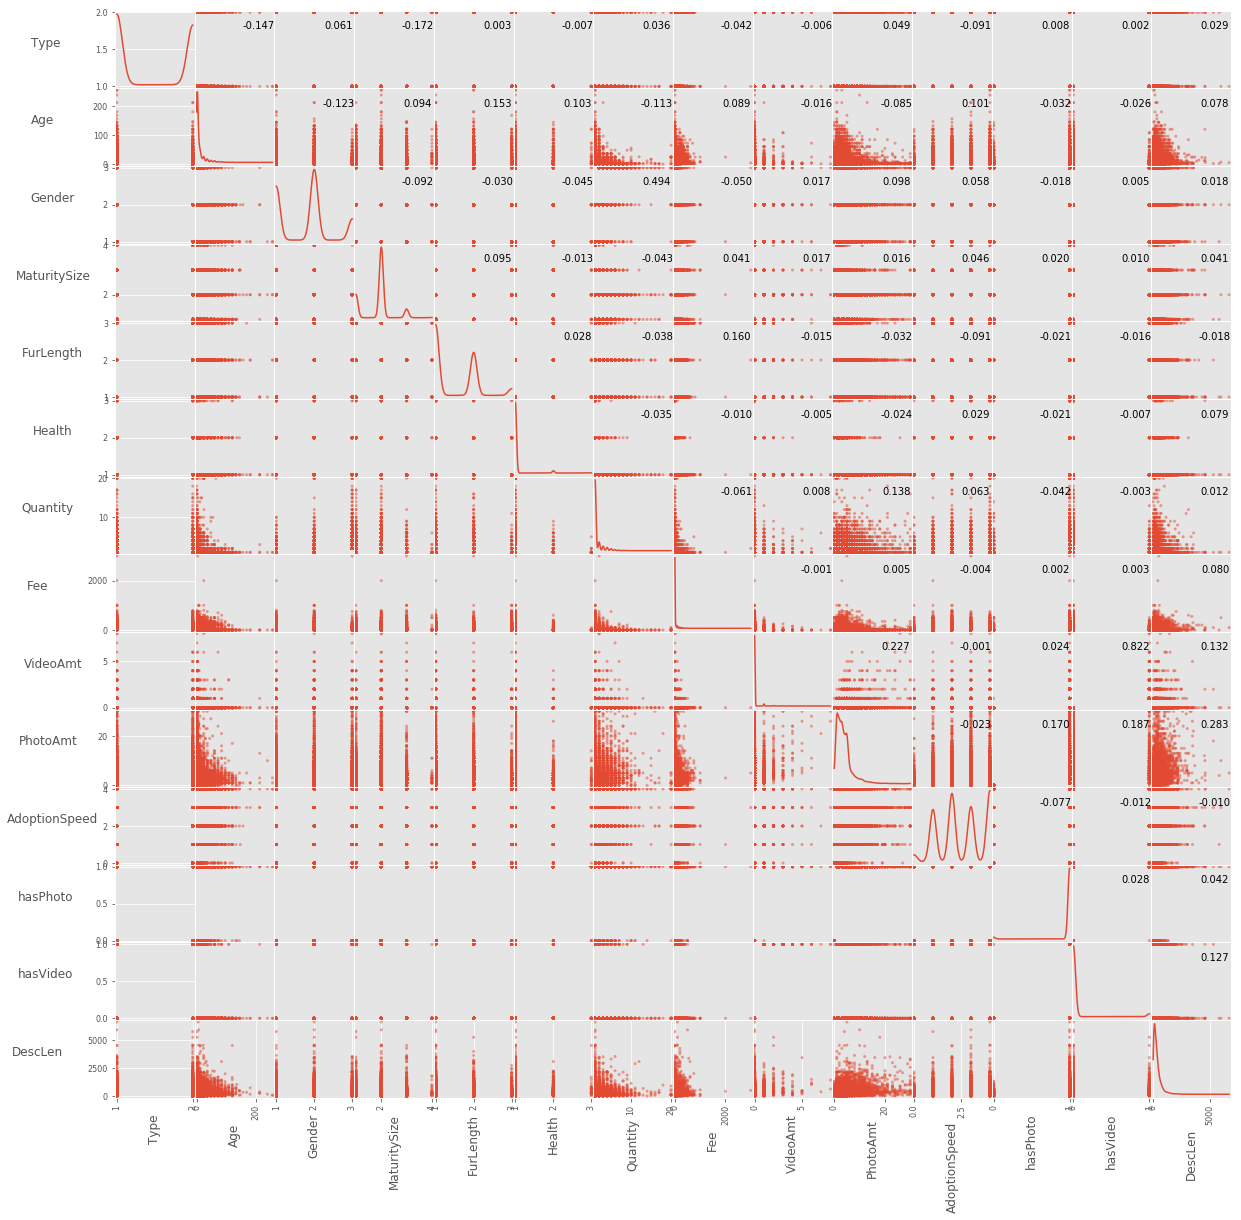

In [196]:
#plot scatter plots with correlation coefficient
from pandas.plotting import scatter_matrix
df_cont_vars = df.select_dtypes(include=['float64', 'int'])
scatter_pl = scatter_matrix(df_cont_vars, figsize=(20,20), diagonal='kde') #get scatter plot for all continous variables at once 
corr = df_cont_vars.corr().values
for i, j in zip(*plt.np.triu_indices_from(scatter_pl, k=1)):
    scatter_pl[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    
n = len(df_cont_vars.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = scatter_pl[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50


In [155]:
df.groupby(['hasPhoto', 'hasVideo'])['AdoptionSpeed'].mean()

hasPhoto  hasVideo
0         0           3.352941
1         0           2.451741
          1           2.362069
Name: AdoptionSpeed, dtype: float64

In [225]:
cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen']

In [226]:
df[cols_log] = df[cols_log].apply(np.log1p)

In [227]:
df.dtypes

Type             int64   
Name             object  
Age              float64 
Breed1           category
Breed2           category
Gender           int64   
Color1           category
Color2           category
Color3           category
MaturitySize     int64   
FurLength        int64   
Vaccinated       category
Dewormed         category
Sterilized       category
Health           int64   
Quantity         float64 
Fee              float64 
State            category
RescuerID        category
VideoAmt         float64 
Description      object  
PetID            object  
PhotoAmt         float64 
AdoptionSpeed    int64   
hasPhoto         int64   
hasVideo         int64   
DescLen          float64 
NameLen          float64 
dtype: object

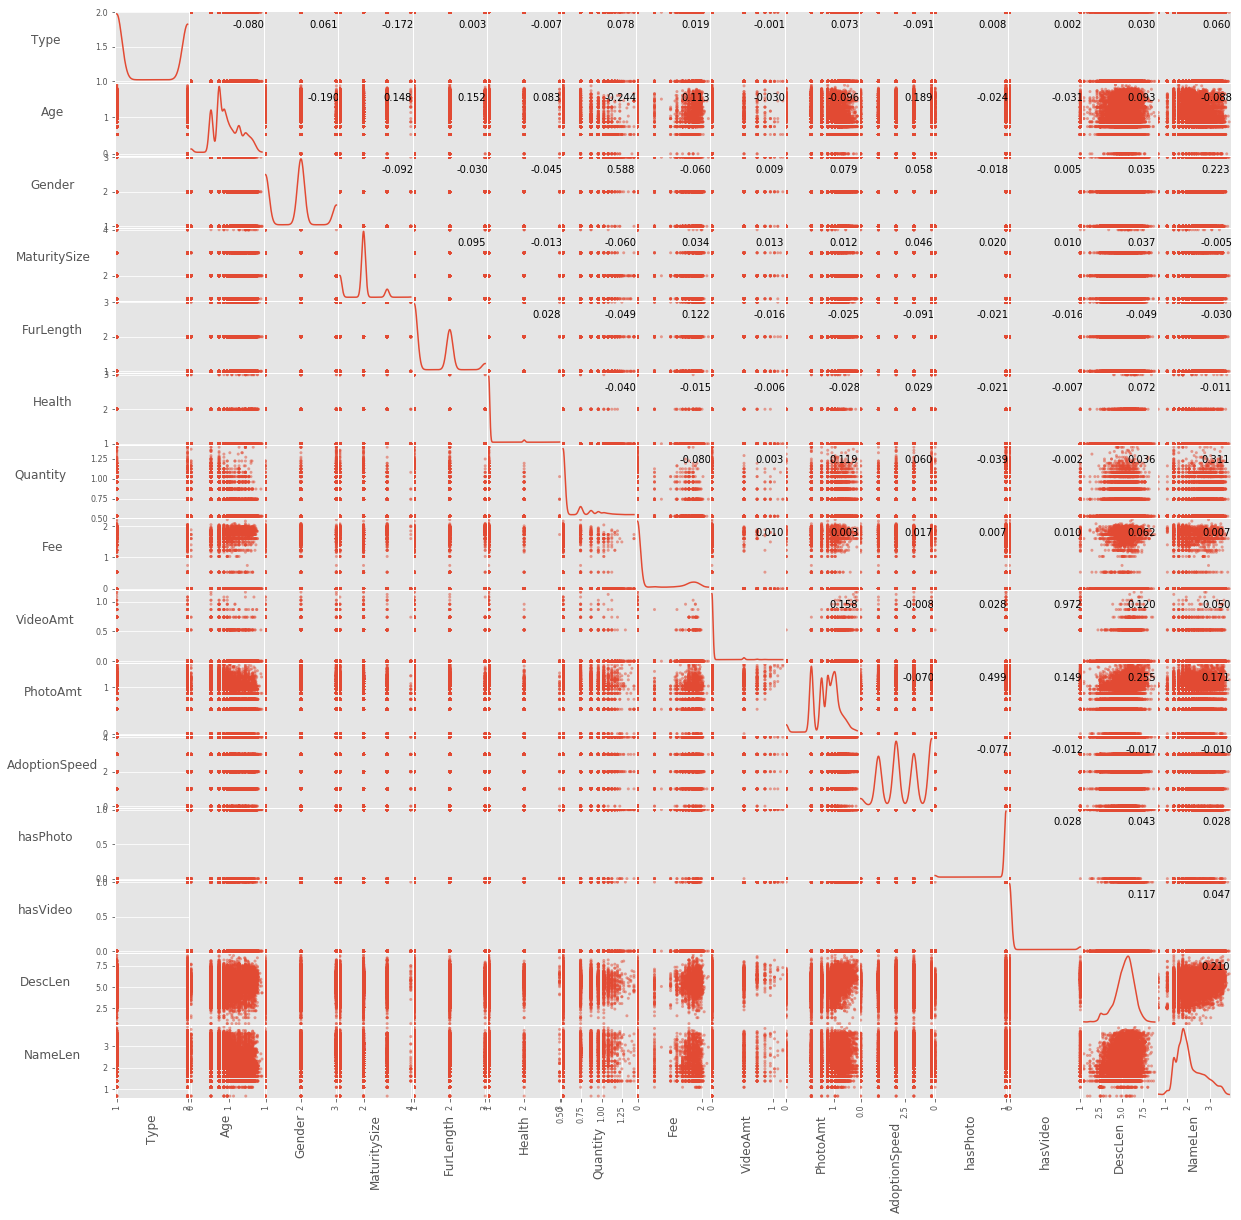

In [228]:
#plot scatter plots with correlation coefficient
from pandas.plotting import scatter_matrix
df_cont_vars = df.select_dtypes(include=['float64','int'])
scatter_pl = scatter_matrix(df_cont_vars, figsize=(20,20), diagonal='kde') #get scatter plot for all continous variables at once 
corr = df_cont_vars.corr().values
for i, j in zip(*plt.np.triu_indices_from(scatter_pl, k=1)):
    scatter_pl[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    
n = len(df_cont_vars.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = scatter_pl[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

In [229]:
df.RescuerID.nunique()

5595

In [235]:
from sklearn.preprocessing import LabelEncoder
#Now lets assign a labels to our quality variable
label_cat = LabelEncoder()
df['RescuerID'] = label_cat.fit_transform(df['RescuerID'])
df['Breed1'] = label_cat.fit_transform(df['Breed1'])
df['Breed2'] = label_cat.fit_transform(df['Breed2'])

In [210]:
df['RescuerID'] = df['RescuerID'].astype('category')

In [221]:
df['NameLen'] = np.log1p(df['Name'].astype(str).fillna('').apply(len))

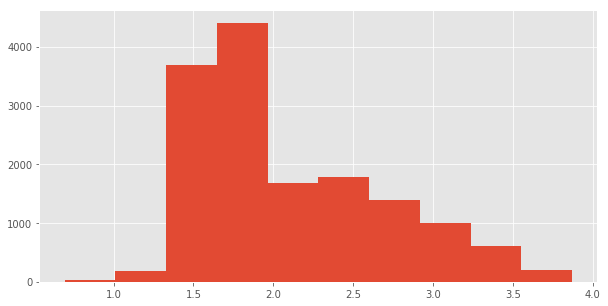

In [222]:
df.NameLen.hist()

In [236]:
df.nunique()

Type             2    
Name             9060 
Age              106  
Breed1           176  
Breed2           176  
Gender           3    
Color1           7    
Color2           7    
Color3           6    
MaturitySize     4    
FurLength        3    
Vaccinated       3    
Dewormed         3    
Sterilized       3    
Health           3    
Quantity         19   
Fee              74   
State            14   
RescuerID        5595 
VideoAmt         9    
Description      14033
PetID            14993
PhotoAmt         31   
AdoptionSpeed    5    
hasPhoto         2    
hasVideo         2    
DescLen          1478 
NameLen          44   
dtype: int64

In [264]:
for i in range(8):    
    for row in df.index:
        if df.loc[row,'Color1'] == i or df.loc[row,'Color2'] == i or df.loc[row,'Color3'] == i:
            df.loc[row,'color_'+str(i)] = 1
        else:
            df.loc[row,'color_'+str(i)] = 0

In [265]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,DescLen,NameLen,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7
0,2,Nibble,0.869742,167,167,1,1,7,0,1,...,5.886104,1.945910,1,1,0,0,0,0,0,1
1,2,No Name Yet,0.526589,136,136,1,1,2,0,2,...,4.779123,2.484907,1,1,1,0,0,0,0,0
2,1,Brisco,0.526589,175,175,1,2,7,0,2,...,5.976351,1.945910,1,0,1,0,0,0,0,1
3,1,Miko,0.959135,175,175,2,1,2,0,2,...,4.990433,1.609438,1,1,1,0,0,0,0,0
4,1,Hunter,0.526589,175,175,1,1,0,0,2,...,5.968708,1.945910,1,1,0,0,0,0,0,0


In [267]:
one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

In [269]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [270]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'AdoptionSpeed', 'hasPhoto', 'hasVideo', 'DescLen',
       'NameLen', 'color_0', 'color_1', 'color_2', 'color_3', 'color_4',
       'color_5', 'color_6', 'color_7', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3'],
      dtype='object')

In [272]:
sel_cols = ['Type', 'Age', 'Breed1', 'Breed2', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'PhotoAmt',  'DescLen', 'NameLen', 'color_0', 'color_1', 'color_2', 'color_3', 'color_4',
       'color_5', 'color_6', 'color_7', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3']

df_ml = df[sel_cols]

# Train & test

In [443]:
def start_proj():

    train = pd.read_csv('../input/train/train.csv')
    train.shape


    train_y = train['AdoptionSpeed']
    train.drop(columns = 'AdoptionSpeed', inplace=True)

    train_y.shape

    train.shape

    test = pd.read_csv('../input/test/test.csv')
    test.shape

    df = pd.concat([train, test], ignore_index=True, sort=False)

    df.shape

    df.Description = df.Description.astype('str')

    df['DescLen'] = df.Description.astype(str).fillna('').apply(len)
    

#cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen']

#df[cols_log] = df[cols_log].apply(np.log1p)

# from sklearn.preprocessing import LabelEncoder
# #Now lets assign a labels to our quality variable
# label_cat = LabelEncoder()
# df['RescuerID'] = label_cat.fit_transform(df['RescuerID'])
# df['Breed1'] = label_cat.fit_transform(df['Breed1'])
# df['Breed2'] = label_cat.fit_transform(df['Breed2'])

#df['RescuerID'] = df['RescuerID'].astype('category')

    df['NameLen'] = np.log1p(df['Name'].astype(str).fillna('').apply(len))

# for i in range(8):    
#     for row in df.index:
#         if df.loc[row,'Color1'] == i or df.loc[row,'Color2'] == i or df.loc[row,'Color3'] == i:
#             df.loc[row,'color_'+str(i)] = 1
#         else:
#             df.loc[row,'color_'+str(i)] = 0

# one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
#        'Sterilized','Health']

# df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# sel_cols = ['Type', 'Age', 'Breed1', 'Breed2', 'Quantity', 'Fee', 'State', #'RescuerID',
#        'VideoAmt', 'PhotoAmt',  'DescLen', 'NameLen', 'color_0', 'color_1', 'color_2', 'color_3', 'color_4',
#        'color_5', 'color_6', 'color_7', 'Gender_2', 'Gender_3',
#        'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
#        'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
#        'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3']

# df_ml = df[sel_cols]
# df_ml.State = df_ml.State.astype(int)

# df_ml.State = df_ml.State.astype(int)

# train_ml = df_ml.iloc[0:14993,]
# test_ml = df_ml.iloc[14993:,]

# train_ml.shape

# test_ml.shape
    return(df)

In [369]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'DescLen', 'NameLen'],
      dtype='object')

In [370]:
sel_cols = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt', 'DescLen', 'NameLen']

df_ml = df[sel_cols]
df_ml.State = df_ml.State.astype(int)

df_ml.State = df_ml.State.astype(int)

train_ml = df_ml.iloc[0:14993,]
test_ml = df_ml.iloc[14993:,]

train_ml.shape

test_ml.shape

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(3948, 21)

# First model classic data

In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_ml,
                                                    train_y, #Y
                                                    random_state=123, #seed
                                                    stratify=train_y, #have a representative sample
                                                    test_size=0.3) #using 30% for test

In [372]:
y_test.head()#, , y_train, y_test

12495    3
4239     4
10247    4
11326    2
12551    3
Name: AdoptionSpeed, dtype: int64

In [373]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = AdaBoostClassifier(n_estimators=9)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
scores = cross_val_score(model,train_ml, train_y, cv=5)
model.fit(train_ml, train_y)

print('mean : {0}, sd: {1}'.format(scores.mean(), scores.std()) )

0.3732770120053357
mean : 0.3776426310232848, sd: 0.005678074888338718


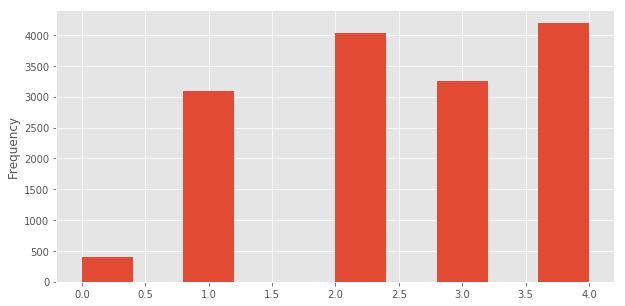

In [340]:
pred = model.predict(test_ml)

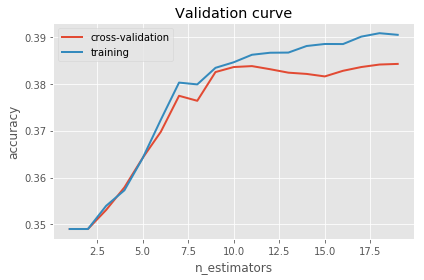

In [305]:
from sklearn.model_selection import validation_curve
n_estimators =range(1, 20)
train_scores, validation_scores = validation_curve(
                 model, train_ml, train_y,
                 param_name='n_estimators',
                 param_range=n_estimators, cv =5)
# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(n_estimators, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(n_estimators, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Validation curve')
plt.tight_layout()


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

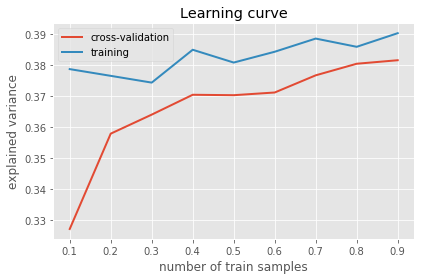

In [303]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
    AdaBoostClassifier(n_estimators=11), train_ml, train_y,
    train_sizes=np.linspace(0.1, 0.9, num=9))

train_sizes=np.linspace(0.1, 0.9, num=9)
# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, validation_scores.mean(axis=1),
        lw=2, label='cross-validation')
plt.plot(train_sizes, train_scores.mean(axis=1),
            lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('number of train samples')
plt.ylabel('explained variance')
plt.title('Learning curve')
plt.tight_layout()


plt.show

In [301]:
np.linspace(0.1, 0.9, num=9)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [344]:
# The following 3 functions have been taken from Ben Hamner's github repository
# https://github.com/benhamner/Metrics
def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat


def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings


def quadratic_weighted_kappa(y, y_pred):
    """
    Calculates the quadratic weighted kappa
    axquadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = y
    rater_b = y_pred
    min_rating=None
    max_rating=None
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return (1.0 - numerator / denominator)

In [346]:
quadratic_weighted_kappa(model.predict(X_test), y_test)

0.29925278327279603

In [374]:
model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
model.fit(train_ml.values, train_y.values)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.015, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

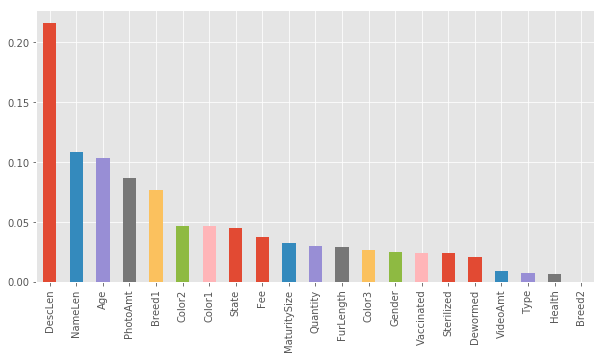

In [389]:
pd.Series(model.feature_importances_, index = train_ml.columns).sort_values(ascending=False).plot.bar()

In [393]:
model.score(train_ml.values,train_y.values)

0.6799839925298473

In [390]:
quadratic_weighted_kappa(model.predict(train_ml.values),train_y.values)

0.6381409428748437

In [392]:
scores = cross_val_score(model, train_ml.values,train_y.values, cv=10, n_jobs=4)
print('mean : {0}, sd: {1}'.format(scores.mean(), scores.std()) )

KeyboardInterrupt: 

In [376]:
import sys
sys.path.append("/Users/URSZULA/Documents/DS_ressources/KG/wiki_web/hyperopt-sklearn") #some path pb tweaking
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe


#Instantiate a HyperoptEstimator with the search space and number of evaluations

estim = HyperoptEstimator(classifier=any_classifier('my_cl'),
                          preprocessing=any_preprocessing('my_pre'),
                          algo=tpe.suggest,
                          max_evals=100,
                          trial_timeout=120)

#X_train.reset_index(inplace=True, drop=True)
estim.fit(train_ml.values, train_y.values,  cv_shuffle=True, n_folds=5)




/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxSc

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMax

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by 

In [377]:
# Show the results

print(estim.score(train_ml.values, train_y.values))


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9987994397385447


In [379]:
quadratic_weighted_kappa(estim.predict(train_ml.values), train_y.values)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.998965416639345

In [380]:
estim.best_model()

{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=0.1651302564901493,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1087, n_jobs=1, oob_score=False, random_state=3,
             verbose=False, warm_start=False),
 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),),
 'ex_preprocs': ()}

## Test feature engineering steep-by-step

### one-hot encoding

In [397]:
df =start_proj()

In [398]:
one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [399]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3'],
      dtype='object')

In [400]:
sel_cols = ['Type', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3']

df_ml = df[sel_cols]
df_ml.State = df_ml.State.astype(int)

df_ml.State = df_ml.State.astype(int)

train_ml = df_ml.iloc[0:14993,]
test_ml = df_ml.iloc[14993:,]

train_ml.shape

test_ml.shape

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(3948, 29)

0.6836523711065163

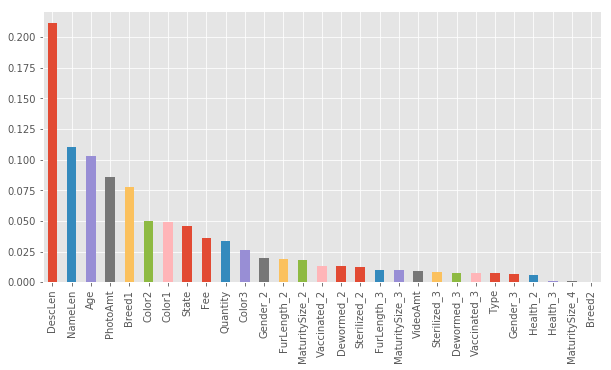

In [401]:
model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
model.fit(train_ml.values, train_y.values)


display(pd.Series(model.feature_importances_, index = train_ml.columns).sort_values(ascending=False).plot.bar())

display(model.score(train_ml.values,train_y.values))

improves the res => keep

** one hot with colors *** 

In [407]:
df =start_proj()

one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health', 'Color1', 'Color2', 'Color3']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



In [408]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'DescLen',
       'NameLen', 'Gender_2', 'Gender_3', 'MaturitySize_2', 'MaturitySize_3',
       'MaturitySize_4', 'FurLength_2', 'FurLength_3', 'Vaccinated_2',
       'Vaccinated_3', 'Dewormed_2', 'Dewormed_3', 'Sterilized_2',
       'Sterilized_3', 'Health_2', 'Health_3', 'Color1_2', 'Color1_3',
       'Color1_4', 'Color1_5', 'Color1_6', 'Color1_7', 'Color2_2', 'Color2_3',
       'Color2_4', 'Color2_5', 'Color2_6', 'Color2_7', 'Color3_3', 'Color3_4',
       'Color3_5', 'Color3_6', 'Color3_7'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.6809844594143933

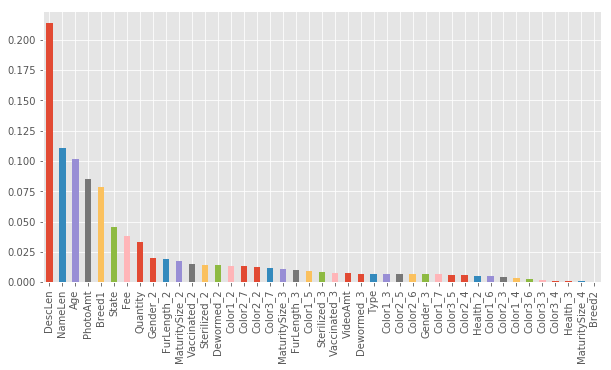

In [409]:
sel_cols = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Quantity', 'Fee', 'State', 'VideoAmt',
    'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3', 'MaturitySize_2',
    'MaturitySize_3', 'MaturitySize_4', 'FurLength_2', 'FurLength_3',
    'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3', 'Sterilized_2',
    'Sterilized_3', 'Health_2', 'Health_3', 'Color1_2', 'Color1_3', 'Color1_4',
    'Color1_5', 'Color1_6', 'Color1_7', 'Color2_2', 'Color2_3', 'Color2_4',
    'Color2_5', 'Color2_6', 'Color2_7', 'Color3_3', 'Color3_4', 'Color3_5',
    'Color3_6', 'Color3_7'
]

df_ml = df[sel_cols]
df_ml.State = df_ml.State.astype(int)

df_ml.State = df_ml.State.astype(int)

train_ml = df_ml.iloc[0:14993, ]
test_ml = df_ml.iloc[14993:, ]

train_ml.shape

test_ml.shape

model = xgb.XGBClassifier(
    n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
model.fit(train_ml.values, train_y.values)

display(
    pd.Series(model.feature_importances_,
              index=train_ml.columns).sort_values(ascending=False).plot.bar())

display(model.score(train_ml.values, train_y.values))

not good

### color reformat

In [ ]:
df =start_proj()

In [402]:
for i in range(8):    
    for row in df.index:
        if df.loc[row,'Color1'] == i or df.loc[row,'Color2'] == i or df.loc[row,'Color3'] == i:
            df.loc[row,'color_'+str(i)] = 1
        else:
            df.loc[row,'color_'+str(i)] = 0

In [403]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3',
       'color_0', 'color_1', 'color_2', 'color_3', 'color_4', 'color_5',
       'color_6', 'color_7'],
      dtype='object')

In [404]:
sel_cols = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Quantity', 'Fee', 'State', 'VideoAmt',
    'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3', 'MaturitySize_2',
    'MaturitySize_3', 'MaturitySize_4', 'FurLength_2', 'FurLength_3',
    'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3', 'Sterilized_2',
    'Sterilized_3', 'Health_2', 'Health_3', 'color_1', 'color_2', 'color_3',
    'color_4', 'color_5', 'color_6', 'color_7'
]

df_ml = df[sel_cols]
df_ml.State = df_ml.State.astype(int)

df_ml.State = df_ml.State.astype(int)

train_ml = df_ml.iloc[0:14993, ]
test_ml = df_ml.iloc[14993:, ]

train_ml.shape

test_ml.shape

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(3948, 33)

0.6829853931834856

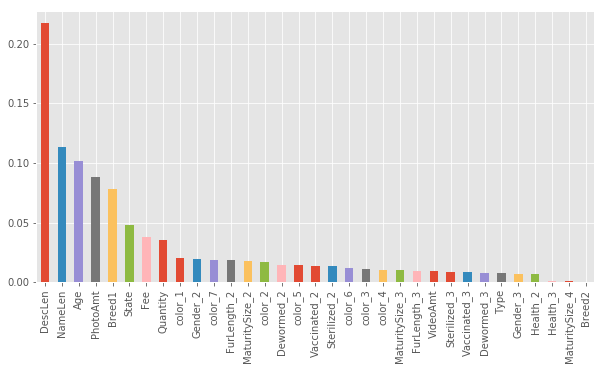

In [405]:
model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
model.fit(train_ml.values, train_y.values)


display(pd.Series(model.feature_importances_, index = train_ml.columns).sort_values(ascending=False).plot.bar())

display(model.score(train_ml.values,train_y.values))

do not help => remove

### log transform

In [447]:
df =start_proj()

one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [448]:

cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen', 'NameLen']

df[cols_log] = df[cols_log].apply(np.log1p)


In [449]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3'],
      dtype='object')

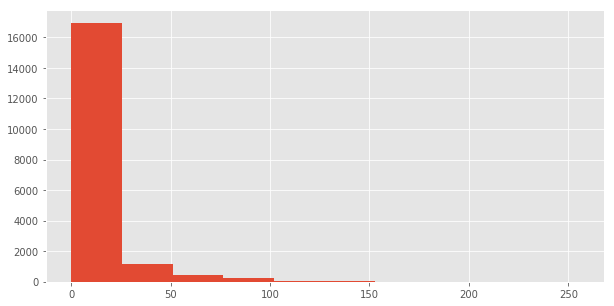

In [421]:
df.Age.hist()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.6923897818982192

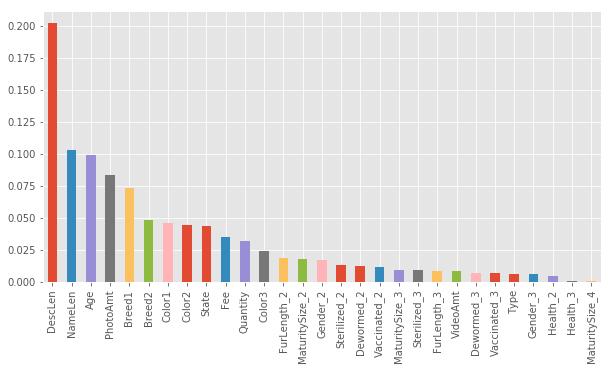

In [450]:
sel_cols = ['Type', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3']

df_ml = df[sel_cols]
df_ml.State = df_ml.State.astype(int)

df_ml.State = df_ml.State.astype(int)

train_ml = df_ml.iloc[0:14993,]
test_ml = df_ml.iloc[14993:,]

train_ml.shape

test_ml.shape

model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
model.fit(train_ml.values, train_y.values)


display(pd.Series(model.feature_importances_, index = train_ml.columns).sort_values(ascending=False).plot.bar())

display(model.score(train_ml.values,train_y.values))

### reduce number of cat

#### Photo & video amt

In [422]:
df =start_proj()

In [423]:
one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



cols_log = ['Age', 'Quantity', 'Fee', 'DescLen', 'NameLen']

df[cols_log] = df[cols_log].apply(np.log1p)


In [424]:
df['hasPhoto'] = 0
df.loc[df['PhotoAmt'] > 0, 'hasPhoto'] = 1 

df['hasVideo'] = 0
df.loc[df['VideoAmt'] > 0, 'hasVideo'] = 1 

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.6674448075768692

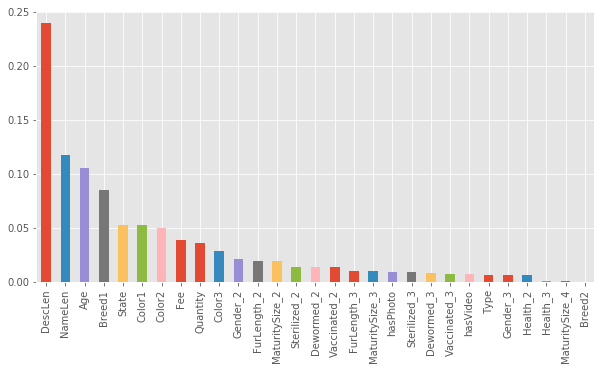

In [426]:
sel_cols = ['Type', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3', 'hasPhoto', 'hasVideo']

def run_xgb():
    df_ml = df[sel_cols]
    df_ml.State = df_ml.State.astype(int)

    df_ml.State = df_ml.State.astype(int)

    train_ml = df_ml.iloc[0:14993,]
    test_ml = df_ml.iloc[14993:,]

    train_ml.shape

    test_ml.shape

    model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
    model.fit(train_ml.values, train_y.values)


    display(pd.Series(model.feature_importances_, index = train_ml.columns).sort_values(ascending=False).plot.bar())

    display(model.score(train_ml.values,train_y.values))
    return(model)
run_xgb() 

bad

#### how many breeds

In [457]:
df =start_proj()

one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen', 'NameLen']

df[cols_log] = df[cols_log].apply(np.log1p)


In [458]:
sameBreed = df.Breed1 == df.Breed2
df['sameBreed'] = sameBreed.astype(bool).astype(int)

In [459]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3',
       'sameBreed'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.6883212165677316

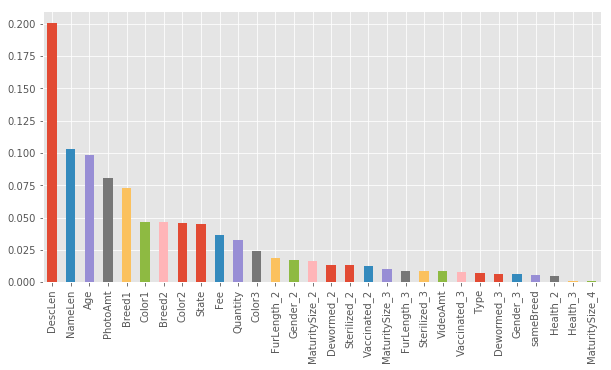

In [460]:
sel_cols = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
    'Quantity', 'Fee', 'State', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
    'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
    'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3',
    'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3', 'VideoAmt',
    'PhotoAmt', 'sameBreed'
]

run_xgb()

#### colors: one color?

In [478]:
df =start_proj()

one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen', 'NameLen']

df[cols_log] = df[cols_log].apply(np.log1p)


In [484]:

df['nbCol'] = 3-df.loc[:,'Color1':'Color3'].isin([0]).sum(axis=1)

In [485]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3',
       'nbCol'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.68958847462149

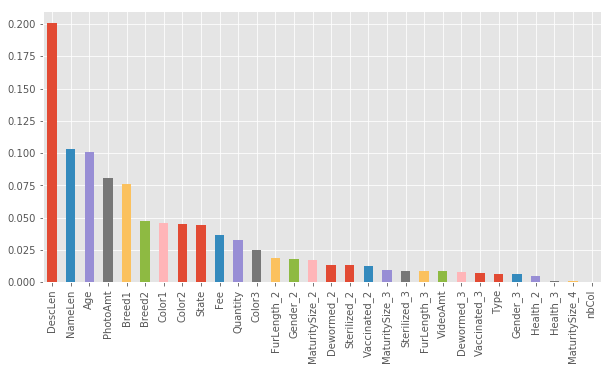

In [486]:
sel_cols = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
    'Quantity', 'Fee', 'State', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
    'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
    'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3',
    'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3', 'VideoAmt',
    'PhotoAmt', 'nbCol'
]

run_xgb()

### feature interactions

#### color & breed

In [502]:
df =start_proj()

one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen', 'NameLen']

df[cols_log] = df[cols_log].apply(np.log1p)

In [503]:
df['Breed1Col1'] = df['Breed1'] * df['Color1']
df['Breed1Col2'] = df['Breed1'] * df['Color2']
df['Breed2Col1'] = df['Breed2'] * df['Color1']
df['Breed2Col2'] = df['Breed2'] * df['Color2']

In [504]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3',
       'Breed1Col1', 'Breed1Col2', 'Breed2Col1', 'Breed2Col2'],
      dtype='object')

In [643]:
sel_cols = [
    'Type', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
    'Quantity', 'Fee', 'State', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
    'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
    'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3',
    'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3', 'VideoAmt',
    'PhotoAmt', 'Breed1Col1', 'Breed1Col2', 'Breed2Col1', 'Breed2Col2'
]



In [644]:
df_ml = df[sel_cols]
df_ml.State = df_ml.State.astype(int)

df_ml.State = df_ml.State.astype(int)

train_ml = df_ml.iloc[0:14993,]
test_ml = df_ml.iloc[14993:,]

display(train_ml.shape)

display(test_ml.shape)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(14993, 33)

(3948, 33)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.7043286867204696

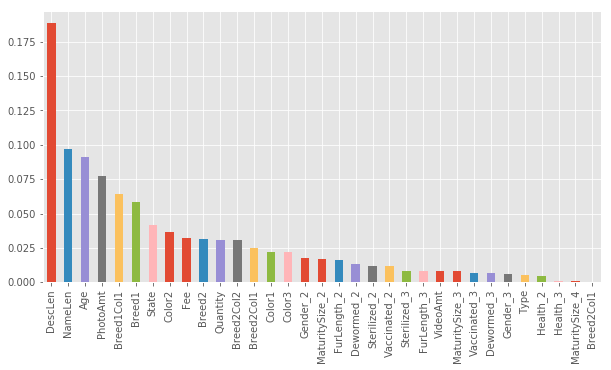

In [593]:
model = run_xgb()

In [596]:
model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
model.fit(train_ml.values, train_y.values)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.015, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [607]:
scores = cross_val_score(model,train_ml.values, train_y.values, cv=10)
print('mean : {0}, sd: {1}'.format(scores.mean(), scores.std()) )

mean : 0.4137900841290948, sd: 0.011229006882510491


In [ ]:
#### state 

#### add description language

In [586]:
df =start_proj()

one_hot_cols=['Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized','Health']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)



cols_log = ['Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt', 'DescLen', 'NameLen']

df[cols_log] = df[cols_log].apply(np.log1p)

df['Breed1Col1'] = df['Breed1'] * df['Color1']
df['Breed1Col2'] = df['Breed1'] * df['Color2']
df['Breed2Col1'] = df['Breed2'] * df['Color1']
df['Breed2Col2'] = df['Breed2'] * df['Color2']

In [584]:
from langdetect import detect

def detect_wrap(str):
    try :
        return(detect(str))
    except :
        return('unknown')
    
    

langs = df.Description.apply(detect_wrap)#.value_counts()

In [534]:
langs.value_counts()

en         17854
id         564  
da         124  
de         77   
zh-cn      40   
no         33   
ro         31   
unknown    29   
tl         23   
fr         18   
af         18   
es         17   
nl         14   
ca         12   
so         11   
ko         11   
fi         9    
it         8    
cy         8    
hr         7    
sv         5    
sk         4    
zh-tw      4    
sl         4    
et         4    
vi         3    
sw         3    
tr         2    
pt         2    
sq         1    
pl         1    
Name: Description, dtype: int64

In [580]:
lang_cor = np.zeros(len(langs))

lang_cor[np.hstack((np.where(langs=='id'), np.where(langs=='ro'),np.where(langs=='hr'),np.array([[17240,17420, 451]])))]=1
lang_cor[np.hstack((np.where(langs=='zh-cn'), np.where(langs=='zh-tw'), np.where(langs=='vi'), np.where(langs=='ko')))]=2


In [587]:
df['lang'] = lang_cor

In [588]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'DescLen', 'NameLen', 'Gender_2', 'Gender_3',
       'MaturitySize_2', 'MaturitySize_3', 'MaturitySize_4', 'FurLength_2',
       'FurLength_3', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2',
       'Dewormed_3', 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3',
       'Breed1Col1', 'Breed1Col2', 'Breed2Col1', 'Breed2Col2', 'lang'],
      dtype='object')

#### group states

In [ ]:
pd.crosstab(train_ml['State'], train_y)

#### preprocessing 

In [606]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

scalers = [('Standard', preprocessing.StandardScaler()), 
            ('MinMax', preprocessing.MinMaxScaler()),
           ('Robust', preprocessing.RobustScaler())]
            
# evaluate each model in turn
dict_method_score = {}
scoring = 'quadratic_weighted_kappa'

print("Method: quadratic_weighted_kappa")

for name, scaler in scalers:
    model = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015)
    X_train_sc = scaler.fit_transform(train_ml.values)
    model.fit(X_train_sc , train_y.values)
    dict_method_score[name]= quadratic_weighted_kappa(model.predict
(X_train_sc), train_y.values)
    print("{:s}: {:.3f}".format(name, dict_method_score[name]))

# model = RandomForestRegressor(random_state=123)
# model.fit(X_train, y_train_log)
# y_pred = model.predict(X_test)
# dict_method_score["No"]= mean_squared_error(y_test_log, y_pred)
# print("{:s}: {:.3f}".format("No", dict_method_score["No"]))

Method: quadratic_weighted_kappa
Standard: 0.665
MinMax: 0.665
Robust: 0.665


### tune xgb

In [655]:
def modelfit(alg, dtrain, sel_cols,target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[sel_cols].values, label=target.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[sel_cols], target.values)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[sel_cols])
    dtrain_predprob = alg.predict_proba(dtrain[sel_cols])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Quadratic gamma : %.4g" % quadratic_weighted_kappa(target.values, dtrain_predictions)   )           
    feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return(alg)

In [659]:
xgb1 = xgb.XGBClassifier(n_estimators=500, nthread=-1, max_depth=8, learning_rate=0.015, num_class =5, objective='multi:softprob')

model = modelfit(xgb1, train_ml, sel_cols,train_y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50)



Model Report
Quadratic gamma : 0.5535


TypeError: 'str' object is not callable

In [706]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.015, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

,model,feat
f0,1585,Type
f1,26496,Age
f10,54810,Breed1
f11,28174,Breed2
f12,5079,Color1
f13,1781,Color2
f14,4889,Color3
f15,2352,Quantity
f16,183,Fee
f17,4678,State


In [705]:
pd.Series(model.get_booster().get_fscore()).sort_index()

f0     1585 
f1     26496
f10    54810
f11    28174
f12    5079 
f13    1781 
f14    4889 
f15    2352 
f16    183  
f17    4678 
f18    2442 
f19    3350 
f2     17092
f20    2054 
f21    3890 
f22    1889 
f23    3422 
f24    2488 
f25    1326 
f26    246  
f27    2426 
f28    22452
f29    18620
f3     9156 
f30    7300 
f31    8922 
f4     6374 
f5     10708
f6     6370 
f7     8943 
f8     9409 
f9     12148
dtype: int64

In [681]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.shape


(32,)

In [685]:
sel_cols

['Type',
 'Age',
 'Breed1',
 'Breed2',
 'Color1',
 'Color2',
 'Color3',
 'Quantity',
 'Fee',
 'State',
 'DescLen',
 'NameLen',
 'Gender_2',
 'Gender_3',
 'MaturitySize_2',
 'MaturitySize_3',
 'MaturitySize_4',
 'FurLength_2',
 'FurLength_3',
 'Vaccinated_2',
 'Vaccinated_3',
 'Dewormed_2',
 'Dewormed_3',
 'Sterilized_2',
 'Sterilized_3',
 'Health_2',
 'Health_3',
 'VideoAmt',
 'PhotoAmt',
 'Breed1Col1',
 'Breed1Col2',
 'Breed2Col1',
 'Breed2Col2']

### separated cats and dogs

## Regression

In [ ]:
# Next two routines are a (better?) way to map float regression values to classes
# by making use of the known training distribution of classes.

# Find boundary locations (equiv. to indices in sorted array)
# for y_pred to match known y percentiles
def get_class_bounds(y, y_pred, N=5):
    # Returns N-1 boundaries in y_pred values that separate y_pred
    # into N classes (0, 1, 2, ..., N-1) with same percentiles as y has.
    ysort = np.sort(y)
    predsort = np.sort(y_pred)
    bounds = []
    for ibound in range(N-1):
        iy = len(ysort[ysort <= ibound])
        bounds.append(predsort[iy])
    return bounds

# Given class boundaries in y_pred units, output integer class values
def assign_class(y_pred, boundaries):
    y_classes = 0*y_pred.copy()
    for iclass, bound in enumerate(boundaries):
        y_classes[y_pred >= bound] = iclass + 1
    return y_classes.astype(int)


In [ ]:
boundaries = get_class_bounds(train_y, train_meta)

train_meta_ints = assign_class(train_meta, boundaries)

# Submission

In [343]:
sample = pd.read_csv('../input/test/sample_submission.csv')
sample.AdoptionSpeed = pred
sample.to_csv('submission.csv', index=False)
